<a href="https://colab.research.google.com/github/romanfen/F21DL-G6/blob/main/Student_Performance_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import sys
sys.path
from platform import python_version
assert sys.version_info >= (3, 5)
print(python_version())

3.7.14


In [84]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
from pylab import rcParams
import seaborn as sb

In [85]:
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [166]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [86]:
# Load the data
def load_data():
    url = "https://raw.githubusercontent.com/romanfen/F21DL-G6/main/datasets/Maths.csv"
    return pd.read_csv(url)

students = load_data()
students_cols = list(students.columns)
print(students_cols)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [87]:
# Look at the data
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [88]:
# Describe the data
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [89]:
# Analyze the data
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The average grade mark for the class sits at around 10 or 11, perfectly average which is to be expected.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa092700550>,
      dtype=object)

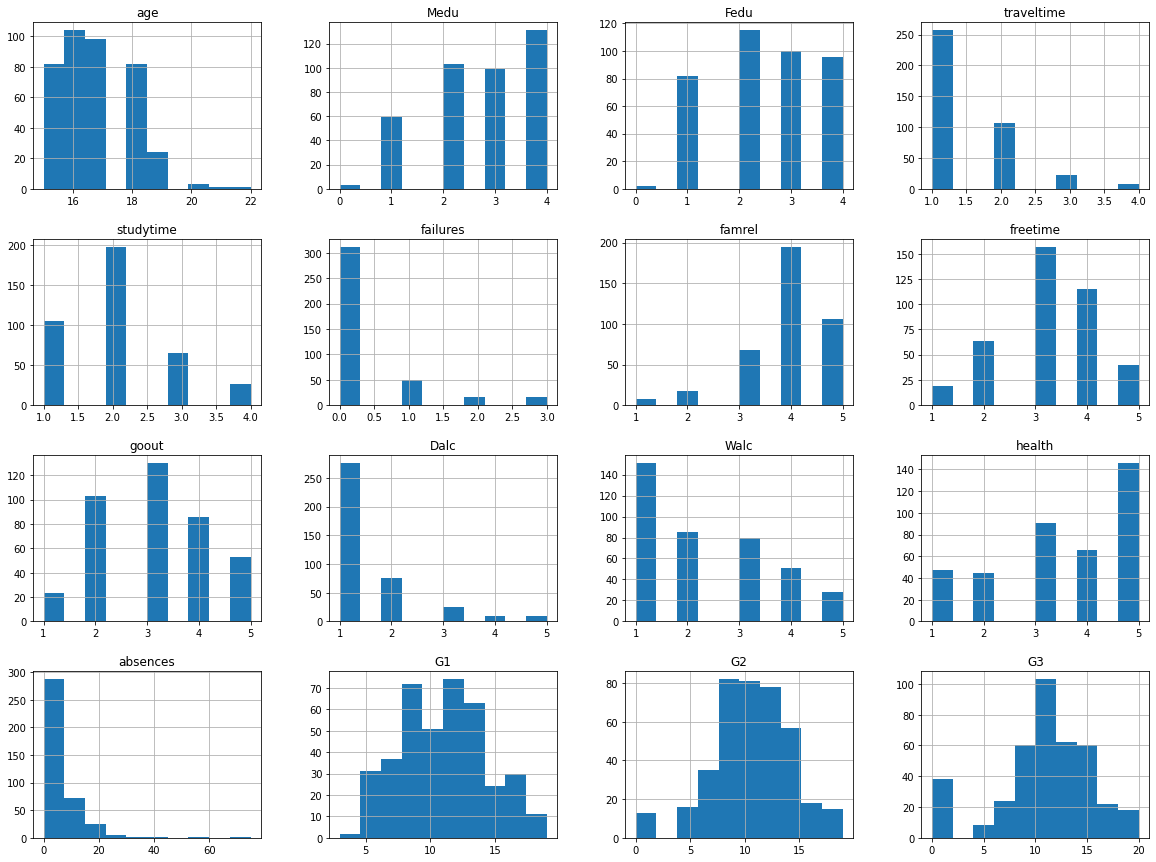

In [90]:
# Look at the data as histograms
students.hist(figsize=(20,15))

In [91]:
# Attribute correlation

corr_matrix = students.corr()
corr_matrix['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

In [92]:
# Set test data aside
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(students, test_size=0.2, random_state=42)

In [93]:
test_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,2,8,8,10
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,4,3,3,2,3,3,3,14,12,12
248,GP,M,18,R,LE3,T,3,3,other,services,...,4,3,3,1,3,5,8,3,5,5
55,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,8,8,9,10
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9


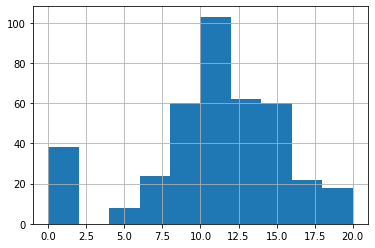

In [94]:
students['G3'].hist()

In [95]:
# Sort Grade 3 results into A,B,C and Fail Grades
# A >= 70%
# B >= 60%
# C >= 50%
# Fail < 70%

students['G3_cat'] = pd.cut(students['G3'],
                            bins=[-np.inf, 9.0, 11.0, 13.0, 20],
                            labels=['Fail', 'C', 'B', 'A'])

In [96]:
students['G3_cat'].value_counts()

Fail    130
C       103
A       100
B        62
Name: G3_cat, dtype: int64

In [97]:
"""
  Fail: 130
  C: 103
  B: 62
  A: 100
"""
students['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

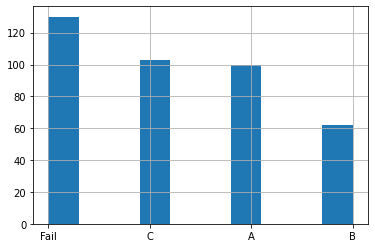

In [98]:
students['G3_cat'].hist()

In [99]:
# Can also do stratified data split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(students, students["G3_cat"]):
    strat_train_set = students.loc[train_index]
    strat_test_set = students.loc[test_index]

Showing that the proportions are the same

In [100]:
strat_test_set["G3_cat"].value_counts() / len(strat_test_set)

Fail    0.329114
C       0.265823
A       0.253165
B       0.151899
Name: G3_cat, dtype: float64

In [101]:
students["G3_cat"].value_counts() / len(students)

Fail    0.329114
C       0.260759
A       0.253165
B       0.156962
Name: G3_cat, dtype: float64

In [102]:
def G3_cat_proportions(students):
  return students["G3_cat"].value_counts() / len(students)

train_set, test_set = train_test_split(students, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": G3_cat_proportions(students),
    "Stratified": G3_cat_proportions(strat_test_set),
    "Random": G3_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [103]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,A
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,C


In [104]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Fail,0.329114,0.329114,0.341772,3.846154,0.000000
C,0.260759,0.265823,0.202532,-22.330097,1.941748
B,0.156962,0.151899,0.126582,-19.354839,-3.225806
A,0.253165,0.253165,0.329114,30.000000,0.000000


In [105]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,A
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,C


In [106]:
# Remove the G3 classes for now
"""
for set_ in (strat_train_set, strat_test_set):
  set_.drop('G3_cat', axis=1, inplace=True)
"""

"\nfor set_ in (strat_train_set, strat_test_set):\n  set_.drop('G3_cat', axis=1, inplace=True)\n"

In [107]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,A
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,C


Preparing Data for ML

In [108]:
students = strat_train_set.drop('G3_cat', axis=1)
students_labels = strat_train_set['G3_cat'].copy()

students_labels

107       A
355    Fail
121       A
36        A
112       B
       ... 
46        C
278    Fail
96        A
126       C
14        A
Name: G3_cat, Length: 316, dtype: category
Categories (4, object): ['Fail' < 'C' < 'B' < 'A']

Data doesn't seem to be normalized properly, this is done below while also adjusting for categorical attributes

In [109]:
# Some of the data was nominal and binary but this switches them to numbers
"""
cat_enc = OneHotEncoder(sparse=False)

def convert_cat(data, column_name):
  col = data[[column_name]]
  col_enc = cat_enc.fit_transform(col)
  data[column_name] = col_enc

convert_cat(students, "school")
convert_cat(students, "sex")
convert_cat(students, "address")
convert_cat(students, "famsize")
convert_cat(students, "Pstatus")
convert_cat(students, "Mjob")
convert_cat(students, "Fjob")
convert_cat(students, "reason")
convert_cat(students, "guardian")
convert_cat(students, "schoolsup")
convert_cat(students, "famsup")
convert_cat(students, "paid")
convert_cat(students, "activities")
convert_cat(students, "nursery")
convert_cat(students, "higher")
convert_cat(students, "internet")
convert_cat(students, "romantic")
"""
cat_attributes = ["school","sex","address",
                  "famsize","Pstatus","Mjob",
                  "Fjob","reason","guardian",
                  "schoolsup","famsup","paid",
                  "activities","nursery","higher",
                  "internet","romantic","G3_cat"]

students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
107,GP,M,16,U,GT3,T,3,3,services,other,...,5,3,3,1,1,5,2,16,18,18
355,MS,F,18,U,GT3,T,3,3,services,services,...,5,3,4,1,1,5,0,10,9,9
121,GP,M,15,U,GT3,T,2,2,services,services,...,5,5,4,1,2,5,6,16,14,15
36,GP,M,15,U,LE3,T,4,3,teacher,services,...,5,4,3,1,1,4,2,15,16,18
112,GP,F,16,U,GT3,T,2,2,at_home,other,...,3,1,2,1,1,5,6,10,13,13


In [110]:
# Scale the dataframe so we can use it
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

students_scaled = scaler.fit_transform(students)
students_scaled = pd.DataFrame(students_scaled, columns=students_cols)

students_scaled.head()
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\n\nstudents_scaled = scaler.fit_transform(students)\nstudents_scaled = pd.DataFrame(students_scaled, columns=students_cols)\n\nstudents_scaled.head()\n'

In [111]:
# Correlate with new scaled data
"""
scaled_corr_matrix = students_scaled.corr()
scaled_corr_matrix['famsup'].sort_values(ascending=False)
"""

"\nscaled_corr_matrix = students_scaled.corr()\nscaled_corr_matrix['famsup'].sort_values(ascending=False)\n"

In [112]:
# remove all the non-numeric columns for now
"""
students_num = students


for attr in cat_attributes:
  students_num.drop([attr],axis=1, inplace=True)
"""

'\nstudents_num = students\n\n\nfor attr in cat_attributes:\n  students_num.drop([attr],axis=1, inplace=True)\n'

In [82]:
students_num = strat_train_set.drop(cat_attributes, axis=1)

In [113]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

students_num_tr = num_pipeline.fit_transform(students_num)

In [114]:
students_num_tr

array([[-0.53226738,  0.23094011,  0.42386704, ...,  1.52440473,
         1.9611253 ,  1.66004431],
       [ 1.01793071,  0.23094011,  0.42386704, ..., -0.25641558,
        -0.47125165, -0.29975894],
       [-1.30736643, -0.68127332, -0.48730293, ...,  1.52440473,
         0.88006888,  1.00677656],
       ...,
       [-0.53226738,  1.14315353,  0.42386704, ...,  0.0403878 ,
         1.15033298,  1.00677656],
       [-1.30736643,  0.23094011,  1.33503702, ..., -1.14682574,
        -0.20098755,  0.1357529 ],
       [-1.30736643, -0.68127332, -0.48730293, ...,  0.93079796,
         1.42059709,  1.22453248]])

In [115]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
107,GP,M,16,U,GT3,T,3,3,services,other,...,5,3,3,1,1,5,2,16,18,18
355,MS,F,18,U,GT3,T,3,3,services,services,...,5,3,4,1,1,5,0,10,9,9
121,GP,M,15,U,GT3,T,2,2,services,services,...,5,5,4,1,2,5,6,16,14,15
36,GP,M,15,U,LE3,T,4,3,teacher,services,...,5,4,3,1,1,4,2,15,16,18
112,GP,F,16,U,GT3,T,2,2,at_home,other,...,3,1,2,1,1,5,6,10,13,13


In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Combines the numerical pipeline with the encoding required for non-numeric values

num_attr = list(students_num)
type(num_attr)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),#  Apply the numerical transformation to the all numeric columns
        ("cat", OneHotEncoder(), cat_attributes), # Apply the One Hot Encoding to the all categorical columns
    ])

students_prepared = full_pipeline.fit_transform(train_set)

In [117]:
students_prepared

array([[-0.58639605,  0.24643712,  0.42320737, ...,  1.        ,
         0.        ,  0.        ],
       [-0.58639605, -0.68063585,  0.42320737, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58639605, -1.60770883,  0.42320737, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.77915057,  0.24643712,  0.42320737, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.20211949,  1.17351009,  0.42320737, ...,  0.        ,
         0.        ,  0.        ],
       [-1.37491159,  1.17351009,  1.35191243, ...,  0.        ,
         0.        ,  0.        ]])

In [118]:
students_prepared.shape

(316, 63)

**Regression Models**

***These Models will test for G3 exact grades***

**Linear Regression Model**


In [61]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(students_prepared, students_labels)

ValueError: ignored

In [217]:
# Attempt at full preprocessing pipeline on a few training instances
sample_data = students.iloc[:5]
sample_labels = students_labels.iloc[:5]
sample_prep_data = full_pipeline.transform(sample_data)

print("Predictions:", lin_reg.predict(sample_prep_data))

Predictions: [18.00097656  8.08496094 14.69628906 16.30371094 11.54101562]


In [220]:
print("Labels:", list(sample_labels))

Labels: [18, 9, 15, 18, 13]


In [221]:
sample_prep_data

array([[-0.53226738,  0.23094011,  0.42386704, -0.65643341,  1.11316592,
        -0.45167896,  1.14410024, -0.2303207 , -0.11078338, -0.54606246,
        -0.99187256,  1.05827115, -0.45374388,  1.52440473,  1.9611253 ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  1.        ,  0.        ],
       [ 1.01793071,  0.23094011,  0.42386704, -0.65643341, -0.04775959,
        -0.45167896,  1.14410024, -0.2303207 ,  0.78684609, -0.54606246,
   

**Mean Squared Error**

In [222]:
from sklearn.metrics import mean_squared_error

grade_predictions = lin_reg.predict(students_prepared)
lin_mse = mean_squared_error(students_labels, grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.877216706751566

**Decision Tree Regressor**

In [223]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(students_prepared, students_labels)

DecisionTreeRegressor(random_state=42)

In [224]:
grade_predictions = tree_reg.predict(students_prepared)
tree_mse = mean_squared_error(students_labels, grade_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Evaluation Using Cross-Validation**

In [231]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, students_prepared, students_labels,
                         scoring="neg_mean_squared_error", cv=10)   # 10 folds are tested
tree_rmse_scores = np.sqrt(-tree_scores)

In [232]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2.16506351 2.60408333 2.66926956 2.06155281 3.40036763 1.87916205
 1.23131192 2.90161245 2.4951566  1.0924964 ]
Mean: 2.2500076261829065
Standard deviation: 0.6831541210345607


In [233]:
lin_scores = cross_val_score(lin_reg, students_prepared, students_labels,
                             scoring="neg_mean_squared_error", cv=10) # 10 folds are tested
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.13241586 2.61360759 2.58909981 2.39383697 2.04138776 2.2748473
 1.94134613 1.82077903 2.32018159 1.8771711 ]
Mean: 2.2004673145736864
Standard deviation: 0.2692100566199834


**Classification Models**

***Predicting a grade the student will get from A,B,C or Fail***

Stochastic Gradient Descent

In [142]:
from sklearn.linear_model import SGDClassifier

students_grade_A = (train_set['G3_cat'] == 'C')

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(students_prepared, students_grade_A)

SGDClassifier(random_state=42)

In [153]:
# Our classifier was set to predict whether a student would recieve an A grade on their final exam of the year
sgd_clf.predict(students_prepared)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False,  True,  True, False,  True,  True, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False,  True, False,  True,  True, False,
       False,  True,

Accuracy Tests

In [144]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, students_prepared, students_grade_A, cv=3, scoring="accuracy")


array([1.        , 1.        , 0.99047619])

Confusion Matrix

In [145]:
from sklearn.model_selection import cross_val_predict

grade_train_pred = cross_val_predict(sgd_clf, students_prepared, students_grade_A, cv=3)

In [146]:
from sklearn.metrics import confusion_matrix

confusion_matrix(students_grade_A, grade_train_pred)

array([[229,   0],
       [  1,  86]])

Precision = 229/229+0 = 1.0
Our current predictions are giving no false positives, need to investigate why this would be


Mostly True Positives.
The remaining being split into a vast majority true negatives and a sole 2 false negatives.

Below is a proof of a perfect working implementation

In [147]:
grade_train_perfect_predictions = students_grade_A
confusion_matrix(students_grade_A, grade_train_perfect_predictions)

array([[229,   0],
       [  0,  87]])

**Precision and Recall**

The result of the precision seems optimistically high which is an indicator something isn't going right

In [148]:
from sklearn.metrics import precision_score, recall_score

precision_score(students_grade_A, grade_train_pred)

1.0

In [149]:
recall_score(students_grade_A, grade_train_pred)

0.9885057471264368

F-Score

In [150]:
from sklearn.metrics import f1_score

f1_score(students_grade_A, grade_train_pred)

0.9942196531791908

** Precision/Recall Trade-off**

In [154]:
grade_scores = sgd_clf.decision_function(students_prepared)
grade_scores

array([ -23.46034575,  -37.20447745,  -77.69269117,  -65.21834737,
        -62.40872008,  -54.45751186,  -54.43857156,  -68.33528572,
        -48.39556275,  -46.6991721 ,  -75.28780119,  -25.00607106,
        -50.15309515,   48.01468636,   54.40719819,  -55.4469704 ,
        -54.60143712,   67.5273231 ,  -37.31819045,  -55.0707171 ,
        -32.02844482,  -54.0675068 ,  -30.91290472,  -45.88414058,
         84.79387705,   78.62185422,  -63.22243198,   46.99881091,
        -40.52485426,  -65.12433966,  -57.40098873,  -74.90313061,
        -69.51170089,   49.26412121,  -67.58690382,   39.5770289 ,
        -45.61700545,  -59.60188722,  -54.35904796,  -53.19423039,
         73.76372796,  -74.71755966,  -41.84544357,   66.39591192,
        -58.36020078,   55.5940479 ,  -39.01081967,  -31.3710042 ,
        -85.98792625,  -92.15984918,  -75.07562488,  -58.05910623,
         52.02326986,  -29.56031285,  -53.00944329,  -39.52348325,
        -28.23808796,  -71.09985144,   44.7349972 ,  -56.95234

In [155]:
threshold = 0
some_pred = (grade_scores > threshold)

In [156]:
some_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False,  True,  True, False,  True,  True, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False,  True, False,  True,  True, False,
       False,  True,

Test with threshold they couldn't meet

In [159]:
threshold = 100
some_pred = (grade_scores > threshold)
some_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [161]:
grade_scores = cross_val_predict(sgd_clf, students_prepared, students_grade_A, cv=3,
                             method="decision_function")

In [164]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(students_grade_A, grade_scores)

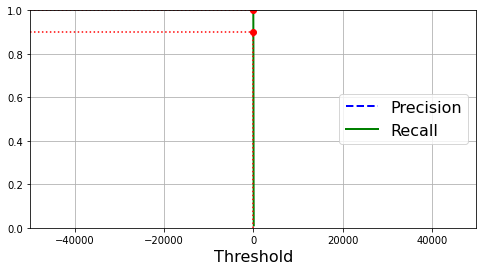

In [167]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

Yeah that graph doesn't look right

**The ROC Curves**

In [168]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(students_grade_A, grade_scores)

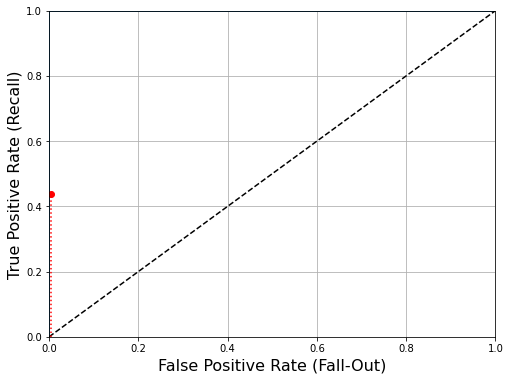

In [169]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

These are not right